[Kaggle competitions](https://www.kaggle.com/competitions) give you experience working with real-world data to solve important problems, and help you prove your skills to peers and potential employers. There's also a large community with lots of resources, happy to help you learn.


# Basic Data Analysis in Python

This workshop introduces the basics of using Python for data analysis, specifically packages like NumPy, Pandas, and Scikit-Learn.

Throughout, we'll be working with a dataset of home prices in Iowa. This is a fairly common dataset for practicing and testing advanced regression techniques. If you're a real estate mogul or something, and you can model housing prices well, then you could recognize undervalued properties and sell them for their true market value, making a bundle in the process. 

In [1]:
import numpy as np
import sklearn as sk

We'll start by talking about programming stuff, like vectorization in NumPy. Then we'll load our dataset as a Pandas dataframe and play around with it, with some minor visualization. We'll spend the final 40% of the talk doing some modeling with SciKit-Learn.

## NumPy

### Arrays

In [2]:
print (np.array(range(10)))
print (np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### Vectorization

In [3]:
import time

n = 10**6

start = time.time()
foo = list(range(n))
for i in range(len(foo)):
    foo[i] = foo[i] + 1
end = time.time()
print ("For loop:", end - start)

For loop: 0.31595349311828613


In [4]:
# slightly better: list comprehensions
start = time.time()
foo = [elem + 1 for elem in foo]
end = time.time()
print(end - start)

0.18413114547729492


In [5]:
foo = np.array(range(n))
start = time.time()
### vectorized code goes here
end = time.time()
print(end - start) 

0.0


### Boolean Indexing

In [6]:
inds = foo < 10
print (foo[inds])
print (foo[~inds])

[0 1 2 3 4 5 6 7 8 9]
[    10     11     12 ..., 999997 999998 999999]


# QUIZ: Get a list/array of all the odd elements of foo

### Miscellaneous stuff

Random number generation is nice.

In [7]:
print (np.random.uniform(0, 1, size=5)) #10 draws from Uniform(0, 1)
print (np.random.normal(0, 100, size=5)) #10 draws from Normal(0, 100)
print (np.random.choice(["A", "B", "C", "D"], size=5)) #10 draws with replacement

[ 0.97703619  0.3716194   0.41039723  0.93180275  0.34857593]
[ 131.2575382     8.30014366  -52.62916248 -237.44592167  -20.13364305]
['C' 'D' 'D' 'B' 'B']


## Pandas

In [8]:
import pandas as pd

df = pd.DataFrame({
        "A":list(range(10)),
        "B":np.random.randn(10),
        "C":7,
        "D":["this is a string" for i in range(10)]
    })

df

,A,B,C,D
0,0,-0.996083,7,this is a string
1,1,0.588561,7,this is a string
2,2,0.523551,7,this is a string
3,3,-0.051693,7,this is a string
4,4,-0.006421,7,this is a string
5,5,-2.999723,7,this is a string
6,6,0.260666,7,this is a string
7,7,0.933028,7,this is a string
8,8,-0.967879,7,this is a string
9,9,-0.721405,7,this is a string


In [9]:
df.iloc[3:7] #iloc for "integer location". Can use this for selecting rows of a dataframe.

,A,B,C,D
3,3,-0.051693,7,this is a string
4,4,-0.006421,7,this is a string
5,5,-2.999723,7,this is a string
6,6,0.260666,7,this is a string


In [10]:
df["B"][[3, 4, 8]]

3   -0.051693
4   -0.006421
8   -0.967879
Name: B, dtype: float64

In [11]:
df["B"][3]

-0.051692513441025718

In [12]:
# Kaggle Competition: Predicting housing prices from data about the house
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques
data = pd.read_csv("train.csv") 
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# Features we'll look at:
# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house
# GarageArea: Size of garage in square feet
# YrSold: Year Sold (YYYY)
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
# YearBuilt: Original construction date

data_subset = data[["SalePrice", "OverallQual", "OverallCond", "GarageArea", 
              "YrSold", "LotArea", "LotFrontage", "YearBuilt"]].copy()
data_subset.head()

,SalePrice,OverallQual,OverallCond,GarageArea,YrSold,LotArea,LotFrontage,YearBuilt
0,208500,7,5,548,2008,8450,65.0,2003
1,181500,6,8,460,2007,9600,80.0,1976
2,223500,7,5,608,2008,11250,68.0,2001
3,140000,7,5,642,2006,9550,60.0,1915
4,250000,8,5,836,2008,14260,84.0,2000


## Matplotlib

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
#^this is a magic line for IPython. Don't worry about it, it's not really that interesting.

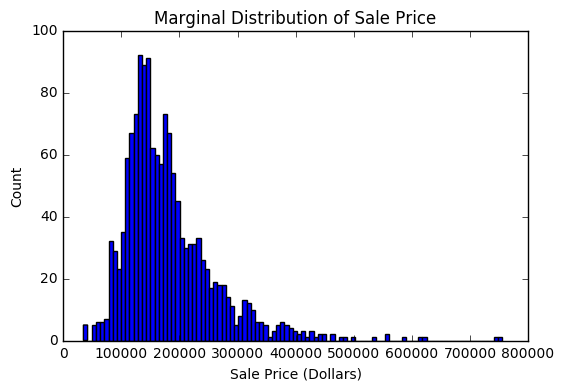

In [15]:
plt.hist(data_subset["SalePrice"], bins=100)
plt.title("Marginal Distribution of Sale Price")
plt.xlabel("Sale Price (Dollars)")
plt.ylabel("Count")
plt.show()

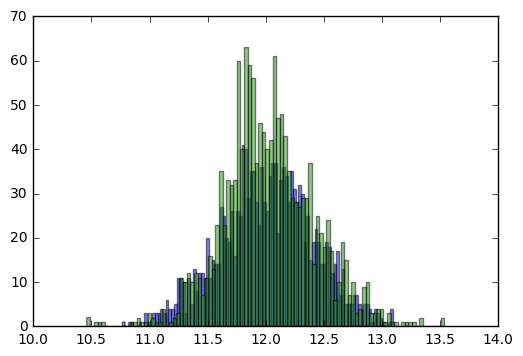

In [16]:
x = np.log(data_subset["SalePrice"])
mu = np.mean(x)
sigma = np.std(x)
n = len(x)
plt.hist(np.random.normal(loc=mu, scale=sigma, size=n), 
         alpha=0.5, 
         color = "blue",
         bins=100)
plt.hist(x, 
         alpha=0.5, 
         bins=100,
        color="#229911")
plt.show()

To create a new column, you can use the following syntax.

In [17]:
data_subset["LogSalePrice"] = np.log(data_subset["SalePrice"])
data_subset.head()

,SalePrice,OverallQual,OverallCond,GarageArea,YrSold,LotArea,LotFrontage,YearBuilt,LogSalePrice
0,208500,7,5,548,2008,8450,65.0,2003,12.247694
1,181500,6,8,460,2007,9600,80.0,1976,12.109011
2,223500,7,5,608,2008,11250,68.0,2001,12.317167
3,140000,7,5,642,2006,9550,60.0,1915,11.849398
4,250000,8,5,836,2008,14260,84.0,2000,12.429216


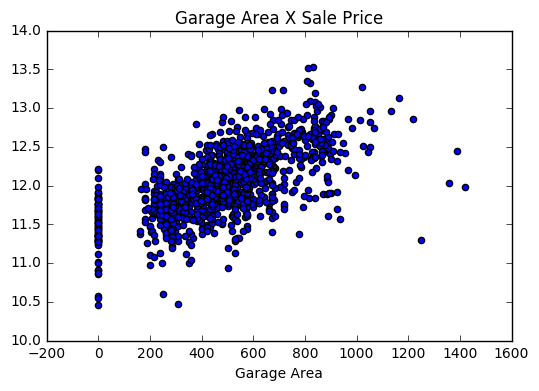

In [18]:
plt.scatter(data_subset["GarageArea"], data_subset["LogSalePrice"])
plt.title("Garage Area X Sale Price")
plt.xlabel("Garage Area")
plt.show()

In [19]:
# Quiz: 
# Add a column HasGarage which is True IFF the house has a garage
# data_subset["HasGarage"] = (data_subset["GarageArea"] > 0)

Visualizations aren't really the focus of this talk, so I won't dwell on matplotlib.

Before we can begin modeling, we ought to take a cursory glance at our data - some of our features have lots of missing values. Particularly `LotFrontage`.

NumPy has a sentinel value "NaN" (not a number) to indicate missing values. If you want to test for missing values, use `np.isnan`, because equality testing for `np.nan` will fail.

In [20]:
for col in data_subset.columns:
    numnan = np.isnan(data_subset[col]).sum()
    if numnan > 0:
        print (col, numnan)

LotFrontage 259


So what do we do with features where we've got missing values? 

Ideas:
* Ditch the feature entirely
* Drop rows where values are missing
* Replace the missing values

For pedagogical purposes, you'll see how each of these can be done in pandas.

In [21]:
# What to do with missing values?

# 1. Ditch the feature entirely
data_feature_ditched = data_subset[["SalePrice", "OverallQual", "OverallCond", "GarageArea", 
              "YrSold", "LotArea", "YearBuilt"]].copy()
print (data_feature_ditched.shape)
data_feature_ditched.head()

(1460, 7)


,SalePrice,OverallQual,OverallCond,GarageArea,YrSold,LotArea,YearBuilt
0,208500,7,5,548,2008,8450,2003
1,181500,6,8,460,2007,9600,1976
2,223500,7,5,608,2008,11250,2001
3,140000,7,5,642,2006,9550,1915
4,250000,8,5,836,2008,14260,2000


In [22]:
# 1 (Cont'd, Improved) 

data_ditched = data_subset.drop("LotFrontage", axis=1)
print (data_ditched.shape)
data_ditched.head()

(1460, 8)


,SalePrice,OverallQual,OverallCond,GarageArea,YrSold,LotArea,YearBuilt,LogSalePrice
0,208500,7,5,548,2008,8450,2003,12.247694
1,181500,6,8,460,2007,9600,1976,12.109011
2,223500,7,5,608,2008,11250,2001,12.317167
3,140000,7,5,642,2006,9550,1915,11.849398
4,250000,8,5,836,2008,14260,2000,12.429216


In [23]:
# 2. Ditch rows where values are missing

# np.isnan(data): returns a new dataframe of bools
# np.sum(data, axis=1): returns the sum of ROWS of the input dataframe (axis = 0 would be columns)
data_clean = data_subset[~np.isnan(data_subset["LotFrontage"])].copy()
print (data_clean.shape)
data_clean.head()

(1201, 9)


,SalePrice,OverallQual,OverallCond,GarageArea,YrSold,LotArea,LotFrontage,YearBuilt,LogSalePrice
0,208500,7,5,548,2008,8450,65.0,2003,12.247694
1,181500,6,8,460,2007,9600,80.0,1976,12.109011
2,223500,7,5,608,2008,11250,68.0,2001,12.317167
3,140000,7,5,642,2006,9550,60.0,1915,11.849398
4,250000,8,5,836,2008,14260,84.0,2000,12.429216


In [24]:
print (data_clean.index) # this COULD get confusing down the line, but it's not really a big deal.
data_clean = data_clean.reset_index()
print (data_clean.index) 

Int64Index([   0,    1,    2,    3,    4,    5,    6,    8,    9,   10,
            ...
            1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459],
           dtype='int64', length=1201)
RangeIndex(start=0, stop=1201, step=1)


In [25]:
# 2 (cont'd)
# More general and pandorable. Maybe I want to check NaNs for lots of rows at once!

# data.dropna(how='any')    #to drop if any value in the row has a nan
# data.dropna(how='all')    #to drop if all values in the row are nan
data_clean = data_subset.dropna(how="any") #dropna returns a new dataframe
print (data_clean.shape)
data_clean = data_clean.reset_index()
print (data_clean.index[-1])
data_clean.head()

(1201, 9)
1200


,index,SalePrice,OverallQual,OverallCond,GarageArea,YrSold,LotArea,LotFrontage,YearBuilt,LogSalePrice
0,0,208500,7,5,548,2008,8450,65.0,2003,12.247694
1,1,181500,6,8,460,2007,9600,80.0,1976,12.109011
2,2,223500,7,5,608,2008,11250,68.0,2001,12.317167
3,3,140000,7,5,642,2006,9550,60.0,1915,11.849398
4,4,250000,8,5,836,2008,14260,84.0,2000,12.429216


In [26]:
# 3. Impute missing values
# Doing this manually is pretty awful tbh. 
data_imputed = data_subset.copy()
data_imputed = data_imputed.fillna(data_imputed.mean())
data_imputed.head()

,SalePrice,OverallQual,OverallCond,GarageArea,YrSold,LotArea,LotFrontage,YearBuilt,LogSalePrice
0,208500,7,5,548,2008,8450,65.0,2003,12.247694
1,181500,6,8,460,2007,9600,80.0,1976,12.109011
2,223500,7,5,608,2008,11250,68.0,2001,12.317167
3,140000,7,5,642,2006,9550,60.0,1915,11.849398
4,250000,8,5,836,2008,14260,84.0,2000,12.429216


In [27]:
pd.isnull(data_subset["LotFrontage"]).sum()

259

In [28]:
pd.isnull(data_imputed["LotFrontage"]).sum()

0

### Pandas Aliasing

We're pretty fast and loose with pointers here. Here's where we can run into trouble

In [29]:
df = pd.DataFrame(np.random.randn(10,3))
df

,0,1,2
0,-0.916174,-0.267230,-0.259834
1,1.561646,-0.868412,0.158948
2,1.347226,-0.288582,0.209196
3,0.672496,1.183127,1.334092
4,-1.135268,1.524883,0.155875
5,-0.731288,-1.142691,-0.772294
6,-1.264973,1.795928,-0.445372
7,-1.030068,-0.022885,-0.136958
8,-0.846899,-1.777248,1.074732
9,1.782767,-1.128537,-0.938414


In [30]:
df2 = df
df2[0][0] = df[0][0] + 1
print (df2[0][0] == df[0][0]) #Modifying df2 modifies df

True


In [31]:
df2 = df.copy()
df2[0][0] = df[0][0] + 1
print (df2[0][0] == df[0][0]) #Fixed

False


In [32]:
df3 = df[1]
df3[0] = df[1][0] + 1
df3[0] == df[1][0] #Oh noes

True

In [33]:
df3 = df[1].copy()
df3[0] = df[1][0] + 1
df3[0] == df[1][0] #fixed

False

## Model Evaluation

In [34]:
from sklearn.model_selection import train_test_split

features = ["OverallQual", "OverallCond", "GarageArea", 
              "YrSold", "LotArea", "LotFrontage", "YearBuilt"]
XTrain, XTest, yTrain, yTest = train_test_split(
    data_imputed[features], 
    data_imputed["LogSalePrice"], 
    test_size=100)
# uppercase X denotes that X is a matrix, and lowercase y denotes a vector

In [35]:
#XTest, XVal, yTest, yVal = train_test_split(XTest, yTest, test_size=50)

## Modeling in SciKit-Learn

Model-fitting in scikit-learn has a very straightforward paradigm to it. 

In [36]:
from sklearn import linear_model 

# Initialize linear regression object
model = linear_model.LinearRegression(fit_intercept=True)

# fit your model to training data
model.fit(XTrain, yTrain)

# Make predictions using the testing set
yPreds = model.predict(XTest)

In [37]:
from sklearn.metrics import r2_score

print ("Test R-Squared:", r2_score(y_true = yTest, y_pred = yPreds))
print ("Training R-Squared:", r2_score(y_true = yTrain, y_pred = model.predict(XTrain)))

Test R-Squared: 0.746733297614
Training R-Squared: 0.772226867414


In [38]:
# Root Mean Squared Error
np.sqrt(np.mean((yTest - yPreds)**2))

0.19984594645208154

In [41]:
# Original basis
np.sqrt(np.mean((np.exp(yTest) - np.exp(yPreds))**2))

48705.659788495635

In [39]:
for i in range(len(features)):
    print (features[i], model.coef_[i])
    
print ("Intercept", model.intercept_)

OverallQual 0.159960119124
OverallCond 0.0436098223249
GarageArea 0.000395133519152
YrSold -0.00328418331005
LotArea 5.25884592326e-06
LotFrontage 0.00143170727137
YearBuilt 0.00271982889371
Intercept 11.6952289797


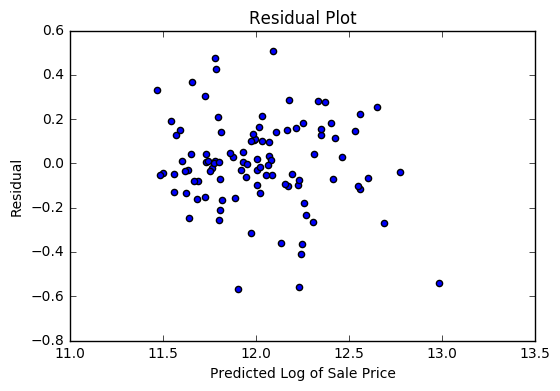

In [40]:
plt.scatter(yPreds, yPreds - yTest)
plt.xlabel("Predicted Log of Sale Price")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()